# Pregnancy support for the self-supporting
##### By Laurien Maarleveld (1266012) and Rangadevi Chakraborty (2026334)


## 1. Introduction
The cancellation and re-implementation of the ZEZ, the 'regeling Zelfstandig En Zwanger', offers an interesting opportunity to study the effect of financial maternity support on self-employment. In this paper, we will research the effect of the (lack of) financial maternity support on the amount of self-employed women.
Using a diff-in-diff approach and the policy changes in this area between 2004 and 2008, we try to estimate the effect of policies to financially support pregnant self-employed workers on self-employment. We discuss the design of our diff-in-diff in section 2 of our paper.

A lack of security benefits for pregnant women with an own company might stifle female self-employment and have a significant effect on the economy and gender income gap. By estimating the effect of policy change on the amount of self-employed women, we hope to find how security benefits stimulate female entrepreneurship.

Furthermore, we hope to inform readers about the potential issues (pregnant) female entrepreneurs may encounter. Therefore, at the beginning and end of this paper, you will be asked for your knowledge and opinion on the topic. 

Our approach is to:
1. Organize and filter the data downloaded from the OECD, World Bank and CBS websites concerning self-employment related variables for the Netherlands for both men and women. 
2. Visualize the trends for both men and women on an annual basis with data from the OECD. 
3. Test with a diff-in-diff set-up for significant differences between pre-2004, 2004-2008 and post-2008 values.
        a. Making sure that other policy changes between 2004-2008 haven't caused the difference between the rates of self-employment of men and women. 
        https://www.kvk.nl/advies-en-informatie/zzp/de-belangrijkste-wetswijzigingen-voor-zzpers-per-1-januari-2019/
        b. Other variables possibly affecting self-employment (such as crisis, interest rates for both loans, unemployment, consumer trust, inflation)
        c. Python diff-in-diff code and equation
        

### 1.1 Information regarding ZEZ
On 4th of June 2008 the government of the Netherlands enacted legislation concerning female self-employed workers and their rights to pregnancy and birth compensation. The ruling provides income-assistance and benefits to expectant women for at least 16 weeks. The policy aims at protecting mother and child by allowing women to temporarily stop working or work less before/during/after the birth of their child. 
The ZEZ ruling effectively re-enacts the previously cancelled policy (Wet Arbeidsongeschiktsheidsverzekering or WAZ)(Kamerstuk 31311 nr. 101). From the cancellation of the latter policy on the 1st of August 2004 until the implementation of the ZEZ on the 4th of June 2008 self-employed women did not have any of these facilities. 
https://zoek.officielebekendmakingen.nl/kst-31311-101.html

    https://zoek.officielebekendmakingen.nl/zoeken/resultaat/?zkt=Uitgebreid&pst=Tractatenblad|Staatsblad|Staatscourant|BladGemeenschappelijkeRegeling|ParlementaireDocumenten&dpr=AnderePeriode&spd=20030101&epd=20050101&sdt=DatumPublicatie&ap=&pnr=1&rpp=10
    
    Although the page is in Dutch, it is worthwile to read up a little bit on the rights of the self-employed mother. 
    
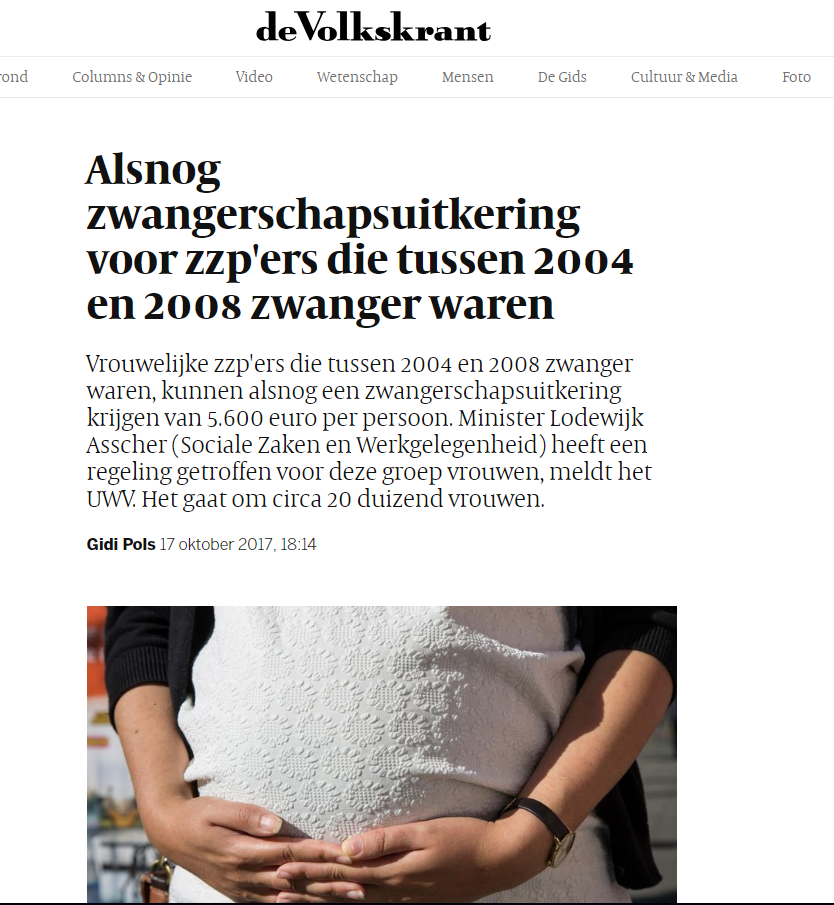

from: https://www.volkskrant.nl/economie/alsnog-zwangerschapsuitkering-voor-zzp-ers-die-tussen-2004-en-2008-zwanger-waren~b6330649b/



##### Who counts as being "self-employed"?
According to the UWV (Uitvoeringsinstituut Werknemersverzekeringen), you're self-employed if
- you're an entrepreneur, it doesn't matter whether you're a ZZP'r or a director/owner. 
-  you work along in a company or business where your partner is self-employed (e.g. you're employed by your partner)
- you are a shareholder in the company you work at.
- you are an independent professional such as a freelancer/dentist, GP, artist, hostparent, caretaker through a PGB (persoonsgebonden budget), alpha help or private household help. 


##### Who is eligible for ZEZ support?
One is only eligible for financial pregnancy support if one has already worked as a self-employed person prior to conception.

##### To how much does the support amount?
One can at most receive benefits (72.25 EU per day if she worked more than 1.225 hours as a self-employed worker) for 16 weeks. These 16 weeks are divided into two parts. 
1. The pre-birth support 
        between 4 and 6 weeks prior to the due date
2. The post-birth support
        approx 10 weeks after the birth has happened. 
        
There are a few exceptions to the rule of 16 weeks, for instance if you have two babies or more you can start receiving your benefit payments between 8 and 10 weeks prior to the proposed due date. 

-https://www.oudersvannu.nl/zwanger/zwangerschap/zwanger-en-zelfstandige/

For further information, we recommend watching the video below.
In this video, two female entrepreneurs explain the practicalities of the ZEZ.

In [75]:
from IPython.display import YouTubeVideo
YouTubeVideo('2d86Mq2qgT8')

### 1.3 Pre-Paper Survey
Since we are trying to raise awareness on the issues regarding pregnancy and self-employment, we are trying to gauge the basic interest and level of knowledge about the subject matter at hand. 

Please fill in the following survey, according to your best knowledge. 

In [76]:
from IPython.display import HTML
HTML(
"""<iframe src="https://docs.google.com/forms/d/e/1FAIpQLScBzlK3XM8l5CahHKrF8NCRU7vAdHn39wExP_1A9GV4-5INNA/viewform?embedded=true" width="640" height="2726" frameborder="0" marginheight="0" marginwidth="0">Loading...</iframe>
"""
)

In [77]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, optimize
import random
import wbdata as wb
from numpy import *
plt.style.use('seaborn')
%matplotlib inline

In [78]:
CBS = pd.read_csv("CBS_data_post_2008.csv", low_memory = False)
other = pd.read_csv("Other_variables_related_to_ZZP(1).csv")
dataother = dict(other)
dfother = pd.DataFrame(dataother)
datacbs = dict(CBS)
cbsdf = pd.DataFrame(datacbs)

In [79]:
OECD = pd.read_csv("OECD_Self_employment_data.csv")
replacements = {
        'MEN' : 0,
        'WOMEN' : 1
}
OECD['SUBJECT'].replace(replacements, inplace=True)

In [80]:
OECD['ZEZ'] = OECD['No ZEZ']*-1

replacements = {
        0 : 1,
        -1 : 0
}
OECD['ZEZ'].replace(replacements, inplace=True)

In [81]:
#print(OECD['ZEZ'])
OECD['interactiontermzez'] = OECD['SUBJECT']*OECD['ZEZ']
#print(OECD['interactiontermzez'])

#### What happened with the self-employment rates amongst men and women between 2004 and 2008?

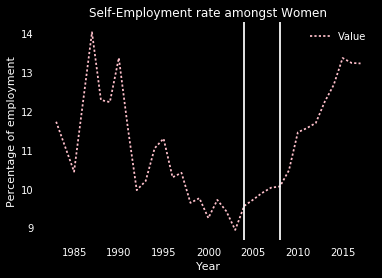

In [82]:
plt.style.use('dark_background')

OECD.loc[OECD['SUBJECT'] == 1].plot(x='TIME', y='Value', kind = 'line', linestyle = ':', color = 'pink')
plt.grid(False)
plt.title('Self-Employment rate amongst Women', color = 'white', size = 'large')
plt.ylabel('Percentage of employment', color = 'white')
plt.xlabel('Year', color = 'white')
plt.axvline(x=2004)
plt.axvline(x=2008)

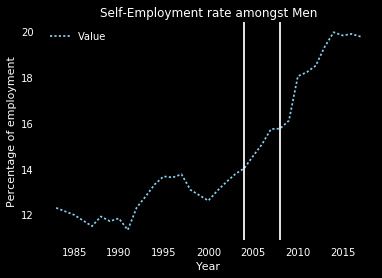

In [83]:
OECD.loc[OECD['SUBJECT'] == 0].plot(x='TIME', y='Value', kind = 'line', linestyle = ':', color = 'skyblue')
plt.grid(False)

plt.title('Self-Employment rate amongst Men', color = 'white', size = 'large')
plt.ylabel('Percentage of employment', color = 'white')
plt.xlabel('Year', color = 'white')
plt.axvline(x=2004)
plt.axvline(x=2008)

## 2. Difference in Difference Design: 

We chose to do a diff-in-diff design since this econometric design fitted the data used in this study best. Moreover, the structure of the diff-in-diff allows to control for other factors that may affect the outcome without any extra controls. We will discuss the factors we deem relevant for the outcomes in this study in section 3, but will first go through our diff-in-diff design.

For a proper difference in difference (dif-in-dif) design we need two subject groups and two periods. A treatment/control group and the results for these groups before and after treatment. In this case, the treatment is whether the subject has lost  benefits from the ZEZ due to the interruption of financial pregnancy support between 2004 and 2008. 

We establish a clear boundary for when the treatment period starts or the treatment occurs. As mentioned before, the ZEZ was cancelled in 2004 and re-implemented in 2008, thus the treatment period (not receiving ZEZ benefits) lies between 2004 and 2008.
First, we will use dif-in-dif to estimate the effect of cacelling the ZEZ in 2004, then we will use another dif-in-dif to estimate the effect of re-implementing the ZEZ in 2008. In this way, we hope to be able to draw a conclusion on what the effect of the ZEZ is on the self-employment rate among women. 

#### We can do a simplified diff-in-diff as follows:

  1) The first difference is calculated by a before and after comparison for the treatment group.
The controlgroup (that doesn't receive the treatment) doesn't necessarily need to have the exact same level, but does need the same trend. We show this below in the graphs. 

  2) For the second difference, we do the same before and after comparison for the control group.
This is also known as the counterfactual: what would have happened in the treatment group in the absence of treatment.

  3) Finally, by subtracting the treatment difference in the control group from that in the treatment group, we find the treatment effect. 

By repeating this process (step 1-3), we discover the effect of the cancellation and reimplementation of the ZEZ. 


#### Using Python's statsmodels module to run regressions, we can do a more elaborate diff-in-diff

The diff-in-diff as described above may be very simple to execute and easy to interpret, but using Python's abilities, we can run a faster and more reliable diff-in-diff.
With our first estimation equation (part A), we will study the effect 
Our first estimation equation (part A) will contain the following variables for the first case:
- Yit : Outcome variable : "Values"
- alpha : baseline
- Beta ( Treatment * Post ) : "SUBJECT" * "No ZEZ" : This is the estimated treatment effect
- delta (TREATi) : "SUBJECT": 1 for treatment group, 0 otherwise. 
- gamma (POSTt) : 1 for treatment period, 0 otherwise : "NO ZEZ"

And for the second case (where ZEZ is reimplemented in 2008)
- Yit : Outcome variable : "Values"
- alpha : baseline
- Beta ( Treatment * Post ) : "SUBJECT" * "ZEZ" : This is the estimated treatment effect
    we need to make a new column for this, where ZEZ = 1 for 2008:2012
- delta (TREATi) : "SUBJECT": 1 for treatment group, 0 otherwise. 
- gamma (POSTt) : 1 for treatment period, 0 otherwise : "ZEZ"


## 3. Other factors that may influence female self-employment

In [84]:
CBS = pd.read_csv("CBS_data_post_2008.csv", low_memory = False)
other = pd.read_csv("Other_variables_related_to_ZZP(1).csv")
dataother = dict(other)
dfother = pd.DataFrame(dataother)
datacbs = dict(CBS)
cbsdf = pd.DataFrame(datacbs)

When studying the effects of financial pregnancy support on the rate of female self-employed workers, we must also take the other factors that may potentially affect female self-employment into account. As mentioned before, with a dif-in-dif research design, the effect of exogenous factors will not affect the difference in outcomes as long as the factors follow similar trends for the treatment and control group.
We have a look at the following factors: the inflation rate, the female and male employment rates, the interest rate, the wage gap between between employed and self-employed workers.

### 3.1 Inflation over 1990 - 2017

The inflation rate has shown major ups and downs in the period commencing in 1990 until 2017. Generally, the inflation rate appeared to be moving cyclically with the economy. In 2000 we observe a major spike in inflation, while male and female unemployment hit their lowest points in 25 years. The explanation for this is simply that in periods of high conjunctures, the national bank increases its overnight interest rates. Doing so, the national bank hopes to act countercyclically and make it harder for individuals to borrow. 

So, we can conclude, although the inflation rate may influence the self-employment rate, it does not do so differently for men and women.

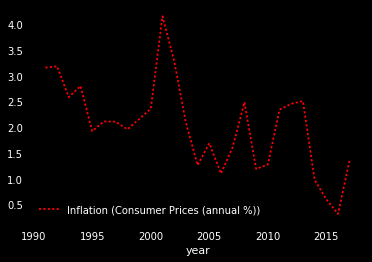

In [85]:
plt.style.use('dark_background')
dfother.plot(x='year', y='Inflation (Consumer Prices (annual %))', kind = 'line', linestyle = ':', color = 'red')
plt.grid(False)

### 3.2 Female Unemployment (as % of female labor force) between 1990 - 2017
When jobs (for women) are scarce, women might become self-employed as an alternative way to make ends meet. 
As a result, the unemployment rate amongst women strongly affect female self-employment rates.

Female unemployment has experienced some significant swings. Specifically, around 2000 and around 2008 female employment dropped significantly low. In contrast, 1995, 2005 and 2014 showed very high levels of female unemployment. These high levels can be explained by the bursting of bubbles such as the dotcom bubble in 2000 and the housing bubble in 2008.  
For more information on the causes and effects of these bubbles, we recommend having a look at the video and link below.

http://www.ifre.com/a-history-of-the-past-40-years-in-financial-crises/21102949.fullarticle 

The video below explains the dotcom bubble in 1 minute.

In [86]:
YouTubeVideo('5ksVshqVuiM')

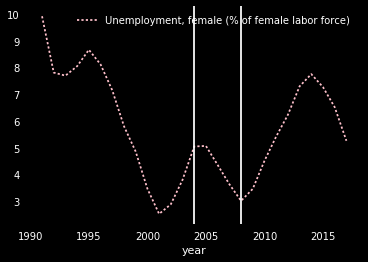

In [87]:
dfother.plot(x='year', y='Unemployment, female (% of female labor force) ', kind = 'line', linestyle = ':', color = 'pink')
plt.grid(False)
plt.axvline(x=2004)
plt.axvline(x=2008)


### 3.3 Male Unemployment (as % of male labor force) between 1990-2017
Similar to the female unemployment tendencies, male unemployment rates have also been heavily influenced by the economic bubbles. Over the course of the years between 1990 and 2017, the dotcom and the housing bubble burst in 2000 and 2008 have had the most significant effect on male unemployment rates.

Again, we can conclude that unemployment rates follow similar trends for men and women, as the rates are largely influenced by economic booms and busts.

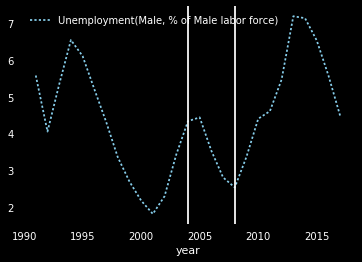

In [88]:
dfother.plot(x='year', y='Unemployment(Male, % of Male labor force)', kind = 'line', linestyle = ':', color = 'skyblue')
plt.grid(False)
plt.axvline(x=2004)
plt.axvline(x=2008)

### 3.4 Lending interest rates over 1990 - 2017
To start an own company or become a self-employed worker, usually some investment capital is needed. The lower the interest rate, the cheaper it is to borrow this investment capital and the more feasible it is to become self-employed.

Using data from the World Bank on the interest rates charged by the ECB, we can study the movement of interest rates over the period between 1990 and 2017.
Since The World Bank did not have data for the interest rate lending pre 2004 and post 2012, those values are indicated as 0.

Here, we observe a similar relation with the conjecture as we found for the inflation rates. 
The interest rate charged remains at a high level during time of high conjecture, but drops during periods of low conjectures. During an economic downturn, the ECB usually lowers interest rates in order to stimulate the economy and save banks' liquidity. For example, the financial crisis in 2008 has led to a major decrease in the interest rate. 

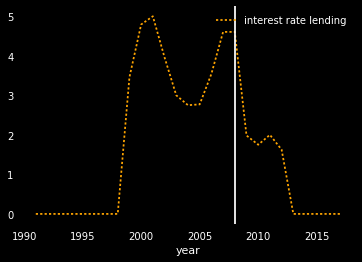

In [89]:
dfother.plot(x='year', y='interest rate lending', kind = 'line', linestyle = ':', color = 'orange')
plt.grid(False)
plt.axvline(x = 2008)

### 3.5 Wagegap in self-employment 1990-2017
The wage gap in self-employment entails the difference between wages earned in traditional employment and wages earned in self-employment.

Since the OECD did not have data on this gap before 2004, values before 2004 are indicated as 0.

Over the past 10 years, the difference between earnings of those who are traditionally employed and those who are self-employed has steadily decreased. When we compare the wage gap in self-employment to the wage gap in traditional employment, we see a huge level difference. Men have generally earned more than women, but the level is much higher in self-employment compared to traditional employment. At this point in time, we are unable to say with any certainty whether this is due to higher ability, experience, risk-appetite or something else entirely, although research does point out that men generally are more risk-loving.
However, level differences are allowed in a diff-in-diff research design. As long as the factors are following a similar trend, exogenous influences are controlled for by having a comparable control group. 

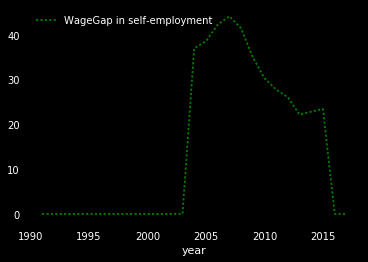

In [90]:
dfother.plot(x='year', y='WageGap in self-employment', kind = 'line', linestyle = ':', color = 'green')
plt.grid(False)

### 3.6 Conclusion on exogenous variables

All of the exogenous variables we think might affect self-employment rates amongst men and women are following a similar trend, as fluctuations in the exogenous factors are caused by economic busts and booms or macroeconomic policies that affect the outcomes more or less equally for men and women.
Although some (such as the wagegap) show some level differences, as level differences do not affect the reliability of the diff-in-diff design, this will not affect our results.


## 4. A simplified diff-in-diff

To do a very simple difference in difference design we can subtract the effect of the treatment in the treatment group from the beginning of the treatment, do the same for the control group (as a matter of time) and then subtract those from one another.

### 4.1 Simplified diff-in-diff A: Cancellation of the WAZ in 2004

In [91]:
dif0 = OECD['Value'].loc[55] - OECD['Value'].loc[51] #This calculates the difference between 2008 and 2004 for women. 
print(dif0)

0.5023079999999993


In [92]:
#print(OECD)
#abs(15.75151 - 14.01921)
dif1 = OECD['Value'].loc[22] - OECD['Value'].loc[18] #This calculates the difference between 2008 and 2004 for men
print(dif1)

1.7323000000000004


In [93]:
#Taking the difference of the treatment group post treatment off the controlgroup 
difnozez = dif0-dif1
print(difnozez)

-1.229992000000001


Technically, the above is the direct treatment effect of cancelling the WAZ, considering that both women and men (treatment and control group) follow the same outcome trend prior to the start of the treatment. 
Thus, we see that when the WAZ is cancelled and the ZEZ is not yet implemented, the self-employment rate of women shows a much weaker growth than that of men. 


### 4.2 Simplified diff-in-diff B: Reimplementation of the ZEZ in 2008
To explore the effect of the reimplementation of the ZEZ, we'll check to see whether the self-employment rate of men or women showed a higher growth rate after 2008. 

In [94]:
dif2 = OECD['Value'].loc[64] - OECD['Value'].loc[55] #This calculates the difference between 2016 and 2008 for women. 
print(dif2)

3.165960000000002


In [95]:
dif3 = OECD['Value'].loc[30] - OECD['Value'].loc[22] #This calculates the difference between 2008 and 2004 for men
print(dif3)

4.129889999999998


In [96]:
#Taking the difference of the treatment group post treatment of the controlgroup 
difzez = dif2-dif3
print(difzez)

-0.963929999999996


This shows that, when the financial support for pregnant self-employed women is reinforced, the negative difference between the growth rate of the female and male self-employed workers starts to decline. The difference is still negative, but not as negative as in case A.

### 4.3 Diff-in-diff-in-diff?

Now, let's check out the difference in difference in difference (the difference between the two simple diff-in-diffs).


In [97]:
difzez-difnozez

0.2660620000000051

Ultimately, this shows us that reimplementing financial pregnancy support decreases the negative difference between male and female self-employment rates by 0.266062 percentage points. This reinforces what we saw when comparing case A and B; when reimplementing financial support in 2008, men still had a higher self-employment rate, but this difference was not as large as in 2004.

## 5. OLS Regressions

#### 5.1 Unadjusted treatment effect
For the first difference, we calculate the treatment effect for those in the treatment group. This means, we regress the rate of self-employment on the absence of financial maternity support for self-employed women.

To make sure we only look at the treatment group, we include an interaction term 'interactionfemnozez' that is only 1 when it is a woman and there is no ZEZ or WAZ present. It is 0 for all men at all times, and also for women when there is some ZEZ or WAZ present.


In [98]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [99]:
np.asarray(OECD)
X = OECD['SUBJECT']
Y = OECD['Value']

#print(OECD)

In [100]:
model = sm.OLS(Y,X)

In [101]:
fit = model.fit()

In [102]:
fit.pvalues

SUBJECT    1.268370e-07
dtype: float64

The table below simply shows whether being a woman (thus receiving treatment) had any significant effect on the percentage of self employment (compared to the control group). 

In [103]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     35.32
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.27e-07
Time:                        03:32:09   Log-Likelihood:                -245.69
No. Observations:                  65   AIC:                             493.4
Df Residuals:                      64   BIC:                             495.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SUBJECT       11.0522      1.860      5.943      0.000       7.337      14.767
==============================================================================
Omnibus:                      167.645   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.442
Skew:                           0.192   Prob(JB):                       0.0242
Kurtosis:                       1.387   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression above, ran to find the first difference, shows the difference before and after treatment for the treatment group (women). It shows the effect of the absence of financial pregnancy support on the amount of self-employed women, and here it is indicated that in years with financial pregnancy support, the rate of female self-employment was 11% higher.

However, this effect is not controlled for the factors that might affect female self-employment rates we mentioned before. This is where our dif-in-dif comes in handy: since we can assume these factors affect our control group similarly, we can filter for these effects by comparing treatment and control group.

In [104]:
OECD['interactionfemnozez'] = OECD['SUBJECT']*OECD['No ZEZ']
OECD.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,No ZEZ,ZEZ,interactiontermzez,interactionfemnozez
0,NLD,SELFEMP,0,PC_EMP,A,1983,12.29585,0,1,0,0
1,NLD,SELFEMP,0,PC_EMP,A,1985,11.99147,0,1,0,0
2,NLD,SELFEMP,0,PC_EMP,A,1987,11.49723,0,1,0,0
3,NLD,SELFEMP,0,PC_EMP,A,1988,11.92120,0,1,0,0
4,NLD,SELFEMP,0,PC_EMP,A,1989,11.71404,0,1,0,0


Now, as mentioned before, we include the interactionterm 'femnozez'. The interaction term above is only 1 when it is a woman and there is no ZEZ or WAZ present. It is 0 for all men at all times, and also for women when there is some ZEZ or WAZ present. 

### 5.2 Diff-in-diff A: Cancellation of financial pregnancy support (WAZ) in 2004

Finally, to run the regression we need as a whole, we include as independent variables the subject dummy (1 for female), "No ZEZ" (1 when there is no ZEZ or WAZ so between 2004 and 2008 for both male and female) and the interaction term "interactionfemnozez" which equals 1 when subject =1 AND "No ZEZ" = 1. (Here we measure the effect of cancelling the WAZ benefits on the percentage of employed women who chose to be self-employed). 

We selected the data ranging from 1998 to 2008, because this bandwidth around the cancellation of the WAZ (2004) provides the best timespan to study the effect of the cancellation, otherwise the time-span would be too short to say anything meaningful about the difference. 

Ultimately, this regression and the coefficient before the interaction term will give us a test whether trend post treatment in the treatment group is different from the trend in the control group. 

In [105]:
y = OECD['Value'].loc[45:55]
x = OECD[['SUBJECT', 'No ZEZ', 'interactionfemnozez']].loc[45:55]

In [106]:
from sklearn import linear_model
import statsmodels.api as sm
regr = linear_model.LinearRegression()
regr.fit(x, y)
x = sm.add_constant(x) #adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     5.701
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0407
Time:                        03:32:10   Log-Likelihood:               -0.30578
No. Observations:                  11   AIC:                             4.612
Df Residuals:                       9   BIC:                             5.407
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
SUBJECT                 9.4522    

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


##### Interpretation

This regression shows that, when controlling for other factors that may affect female self-employment rates, and taking into account data from 1998 through 2008, the absence of financial pregnancy support for self-employed mothers leads to a decrease in female self-employment rates of .198 percentage point. 
The P-value of 0.041 means we can reject the null hypothesis at the 5 percent level of significance. 

Python's regression output also provides us with some very useful significance tests.
From the Durbin-Watson test, we find that our data show a high degree of serial correlation. However, this is unavoidable: women who chose to become self-employed in 2008, are very likely to remain self-employed in 2009. 

### 5.3 Diff-in-diff B: Reimplementation of financial pregnancy support (ZEZ) in 2008
In this section, we follow a similar approach as in diff-in-diff A, but this time we estimate the effect of the reimplementation of financial pregnancy support for self-employed women.
We regress the rate of self-employment women ('VALUE') on the independent variables: 
Subject (whether male(0) or female(1)), ZEZ (1 during the years of 'WAZ' or 'ZEZ', 0 for years without any support for pregnant self employed women), and the interaction term (1 for years where both "female" and "ZEZ = 1")

To study the effect of the reimplementation, we choose our bandwidth from 2008 to 2016, since this provides us with the best timespan to study the effect of reimplementing financial pregnancy support.

In [107]:
y1 = OECD['Value'].loc[55:64]
x1 = OECD[['SUBJECT', 'ZEZ', 'interactiontermzez']].loc[55:64]

Here we measure the effect of the ZEZ being available. Therefore the interactiontermzez = 1 when Subject =1 and in the time that either WAZ or ZEZ was in effect (ZEZ = 1)

In [108]:
regr.fit(x1, y1)
x1 = sm.add_constant(x1) #adding a constant

model = sm.OLS(y1, x1).fit()
predictions = model.predict(x1)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     4.221
Date:                Sun, 27 Jan 2019   Prob (F-statistic):             0.0740
Time:                        03:32:11   Log-Likelihood:                -13.019
No. Observations:                  10   AIC:                             30.04
Df Residuals:                       8   BIC:                             30.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
SUBJECT               10.0587      0

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


The regression results are reported above. It does seem that in the case of a female subject, we can conclude that the coefficient of the interaction term equals 1.0769 with a standard deviation of .524, significant to the 10 percent level. This means that after the maternity support was reimplemented, women have a higher coefficient than during the period with absent maternity support. 

    1.0769-.198=.8789
  The difference between the two coefficients is .8789. Because both of the coefficients are significant to the 10 percent level of significance, the difference is also significant. 
 However, we should also keep in mind that the R squared and adjusted R-squared is not very high, in fact this coefficient seems to only explain about 34 percent of the deviations in the data. 

## 6. Are the underlying assumptions of the diff-in-diff satisfied?

The econometric research design method of the dif-in-dif relies on some strong assumptions.
When using observational data, it is important the following is plausible:


##### 1) Treatment assignment independent from outcome
The reason behind the cancellation of the WAZ and the re-implementation of the ZEZ was not to directly influence the amount of self-employed women, but more to make sure there was sufficient support for those who already were self-employed. The increase/decrease of the self-employment rate among women was a side effect of the policy, not what the policy was directly aimed at.

##### 2) Similar trends in outcome
As shown before, the self-employment rates amongst men and women are following a similar trend over the course of the years from 2000 until 2015. Hence, we can assume this assumption is indeed satisfied.

##### 3) No other policies pursued
To find out whether this assumption is satisfied, we'll discuss some of the policies that were pursued around the same time the ZEZ was adopted and that could possibly have an effect on whether women enter the self-employed workforce.
 https://zoek.officielebekendmakingen.nl/zoeken/resultaat/?zkt=Uitgebreid&pst=Tractatenblad|Staatsblad|Staatscourant|BladGemeenschappelijkeRegeling|ParlementaireDocumenten&dpr=AnderePeriode&spd=20030101&epd=20050101&sdt=DatumPublicatie&ap=&pnr=1&rpp=10
 
        https://www.kvk.nl/advies-en-informatie/zzp/de-belangrijkste-wetswijzigingen-voor-zzpers-per-1-januari-2019/
        
  #### Potentially relevant policy: Motion Bussemaker

When looking through the new policies enacted between 2000 and 2010 (the period commencing our diff-in-diffs), we found only a motion, 'Motion Bussemaker', that might have influenced the female self-employment rate.
On September 16th 2004 a motion (initiated by Bussemaker) was accepted to research the options for elderly to start as self-employed, independent worker. On September 27th the State Secretary of Social Issues and Employment H.A.L. Van Hoof mentioned that elderly entrepreneurs, women and migrants experience the following issues in becoming self-employed:

- Lack of good information and guidance, especially in the start- and growth phases. 

- High administrative costs. The amount of policies and administrative duties doesn't demotivate but also increase costs for small entrepreneurs. Additionally, the costs of social insurance for the entrepreneur him/herself or for any personnel (not applicable in this situation) becomes an issue. 

- Lack of capital to start and grow a business. 

This ties into our research because the opportunity cost for entrepreneurs, especially when they are planning to have a child while being self-employed increases tremendously. The situation that these women face is the choice between either being employed at a firm or organization and receiving maternity benefits that continue to pay out 16 weeks of (partial) salary, or to stay independent 
https://zoek.officielebekendmakingen.nl/kst-27046-10.html?zoekcriteria=%3fzkt%3dUitgebreid%26pst%3dTractatenblad%257cStaatsblad%257cStaatscourant%257cBladGemeenschappelijkeRegeling%257cParlementaireDocumenten%26vrt%3dZelfstandig%26zkd%3dAlleenInDeTitel%26dpr%3dAnderePeriode%26spd%3d20030101%26epd%3d20050101%26sdt%3dDatumPublicatie%26ap%3d%26pnr%3d3%26rpp%3d10%26_page%3d4%26sorttype%3d1%26sortorder%3d8&resultIndex=38&sorttype=1&sortorder=8

Although the motion has not lead to concrete measures yet, this does not necessarily mean it did not have any influence on the outcome (female self-employment rate). Knowing that the government might make concessions in the future to make self-employment easier, more women might choose to become self-employed. However, since this effect is only 'hypothetical' and we cannot measure a direct effect, we assume away this effect for the purpose of our study. 


### 7. Conclusion
From the regression results in our diff-in-diff design, we can derive that when the policy for financial support for self-employed pregnant women are implemented, the self-employment rate of women increases. Similarly, when policies like these become absent, the self-employment rate amongst women either drops or loses momentum as we've seen in 2004 where our graphs showed a slowdown in growth of self-employment starting in 2004 after it had picked up in 2003. Men on the other hand went from concave to convex in 2004, suggesting that while women may have slowed down their jmping into self-employment, men seemed to have taken some of their places. This further implies that when these women-unfriendly policies are implemented, the job opportunities go to men instead. 

We found this in 2004, when the WAZ was cancelled and the female self-employment rate dropped by (VALUE%), compared to the self-employment rate amongst men.
Again, we found this effect in 2008 when the ZEZ was implemented, financial support for pregnant self-employed ladies was reinstalled, and the self-employment rate increased by (VALUE%). 

From this, we can conclude that financial support for pregnant self-employed workers not only provides financial security during and before childbirth, but also affects the rate of self-employment in a country as a whole. Thus, this policy cannot only be used to support those who are self-employed and pregnant, but also to stimulate self-employment in the economy. This is something policy makers must surely take into account.

### 8. Discussion

As with any other paper, there are some factors that would be very interesting for futher study.

For example, we have relied on the properties of diff-in-diff design for filtering out exogenous factors. According to the dif-in-dif, as long as exogenous factors follow similar trends, the effects of these factors will be filtered away when comparing treatment effects in the control group with the treatment group.
However, there are different methods available to study and control for these exogenous factors. For example, by using fixed effects, one can also test and control for influences from exogenous factors.

Moreover, we have gone through the most relevant policies implemented in the time period around the cancellation and re-implementation of financial pregnancy support. We have reasoned that most policies implemented during this period probably did not have any major influence on the self-employment rate amongst women. 
However, it would be very valuable if we were to find a way to measure the indirect effect 'motions' or  the influence of political attention on female self-employment and incorporate this in our study. This would be interesting to elaborate on in further study, especially if a follow-up study has room for more complex econometric methods.



### Post- Paper Survey
The following survey is designed to gather information about the value of the information provided in this paper. It also asks whether the reader would recommend the paper to their friends and whether they believe it is important to to be aware of their rights. Getting this feedback will allow us to improve our papers and surveys in the future, and test the quality of our current writing.

In [109]:
HTML("""<iframe src="https://docs.google.com/forms/d/e/1FAIpQLScGnCq60Wa2sh7uYrjItyTvzptQE0SA4_pMqHS-fN4lwOaI5A/viewform?embedded=true" width="640" height="2164" frameborder="0" marginheight="0" marginwidth="0">Loading...</iframe>""")

### References

Anderson, S. (2000) ‘A history of the past 40 years in financial crises’ International Financing Review. Retrieved from http://www.ifre.com/a-history-of-the-past-40-years-in-financial-crises/21102949.fullarticle

Asscher, L.F. (2004, October 1) ‘Bevordering arbeidsdeelname oudere werknemers’ Kamerstuk 27 046. Tweede Kamer der Staten Generaal, den Haag. Retrieved from https://zoek.officielebekendmakingen.nl/kst-31311-101.html

Asscher, L.F. (2013, July 19) ‘Zelfstandig Ondernemerschap’ Kamerstuk 31 311. Tweede Kamer der Staten Generaal, den Haag. Retrieved from https://zoek.officielebekendmakingen.nl/kst-31311-101.html

Centraal Bureau voor Statistiek (2014, December 15) ‘Rapportage CBS tbv IPO ZZP: Achtergrondkenmerken en ontwikkelingen van zzp’ers in Nederland’ Retrieved from https://www.cbs.nl/nl-nl/achtergrond/2014/51/rapportage-cbs-tbv-ibo-zzp-achtergrondkenmerken-en-ontwikkelingen-van-zzp-ers-in-nederland

CBS Open Data Statline. (2008). Startende zelfstandigen; positie jaar eerder, SBI 2008, kenmerken. Available from CBS Open Data Statline site https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=83754NED&_theme=196

Kamer van Koophandel (2019, January 1) ‘De belangrijkste wetswijzigingen voor zzp’ers per 1 januari 2019’
Retrieved from https://www.kvk.nl/advies-en-informatie/zzp/de-belangrijkste-wetswijzigingen-voor-zzpers-per-1-januari-2019/

Ouders van Nu ‘Zwangere ZZP’er? Je hebt recht op een ZEZ-uitkering’ 
Retrieved from https://www.oudersvannu.nl/zwanger/zwangerschap/zwanger-en-zelfstandige/

OECD (2019), Self-employment rate (indicator). doi: 10.1787/fb58715e-en (Accessed on 23 January 2019) Available from OECD website https://data.oecd.org/emp/self-employment-rate.htm

Pols, G. (2017, October 17) ‘Alsnog zwangerschapsuitkering voor zzp’ers die tussen 2004 en 2008 zwanger waren.’ De Volkskrant
Retrieved from https://www.volkskrant.nl/economie/alsnog-zwangerschapsuitkering-voor-zzp-ers-die-tussen-2004-en-2008-zwanger-waren~b6330649b/ 
